# Importing Packages

In [1]:
import langchain
from langchain.text_splitter import RecursiveCharacterTextSplitter
import fitz
from tqdm.auto import tqdm 
import pandas as pd
import json

C:\Users\Administrator\anaconda3\envs\alaa_ai_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import nltk
from nltk.tokenize import word_tokenize

In [3]:
from sentence_transformers import SentenceTransformer

In [4]:
import tiktoken
import matplotlib.pyplot as plt

In [5]:
from spacy.lang.en import English

In [6]:
import random

# Loading json file

In [7]:
# Loading Json file
def read_json_file(file_path):
    with open(file_path, 'r') as json_file:
        json_data = json.load(json_file)
    return json_data

In [8]:
json_data = read_json_file("general_file_posts_pages.json")

# Viewing our dataset in a Dataframe

In [14]:
# Create DataFrame
df = pd.DataFrame(json_data)

print("Note: metadata contains (source , title , link , page_number , hour_of_update , minute_of_update , post_number) ... Nan is between Page_number and Post_number when you find Nan in our Dataframe that means that one of them has a value not both ...")

# Normalize the 'metadata' column
metadata_df = pd.json_normalize(df['metadata'])

# Combine the original DataFrame with the normalized metadata DataFrame
combined_df = pd.concat([df.drop(columns=['metadata']), metadata_df], axis=1)

combined_df.head()

Note: metadata contains (source , title , link , page_number , hour_of_update , minute_of_update , post_number) ... Nan is between Page_number and Post_number when you find Nan in our Dataframe that means that one of them has a value not both ...


,page_content,source,title,link,page_number,hour_of_update,minute_for_update,post_number
0,Heading\nGet in Touch\nOur pricing bundles\nVo...,0 page_source,Pricing,https://www.expertflow.com/pricingtest/,1,1,3,NaN
1,Business Analytics & Insights\nSimplify report...,1 page_source,Insights,https://www.expertflow.com/insights/,1,1,3,NaN
2,All that you want to connect to your Contact C...,2 page_source,Integrations,https://www.expertflow.com/integrations/,1,1,3,NaN
3,Outbound Campaigns\nA multichannel campaign ma...,3 page_source,Outbound Campaigns,https://www.expertflow.com/outbound-campaigns-2/,1,1,3,NaN
4,Callback\nLet your customers request an agent ...,4 page_source,Callback-new,https://www.expertflow.com/callback-new/,1,1,3,NaN


# Get a 3 Random Documents

In [15]:
import random

random.sample(json_data, k=3)

[{'page_content': ' Pricing Documentation\nShow Pricing\nCustomer Information Screen-pop The caller account popup on call arrival happens based on the caller’s phone number. The caller’s number is matched with any of the Service Cloud Contact’s phone number fields and the popup takes place within the Oracle Service Desk interface. CTI Call controls\nControls/buttons on the toolbar change based on the current state of the agent/call and on the telephony event fired from the contact center. Using the communication toolbar, the agent can perform the following actions. Accept an incoming call. Hold/Resume/End call. Consult call. Transfer call. Conference call. * blind transfer in case of CCX only supported in 11.6 or higher. Agent State Controls The CTI toolbar within Oracle Service also allows the agents to manage their states. The following state controls are supported, Ready Not Ready Login Logout Email & Chat/ Supervisor Features\nHandle non-voice channels (\nchat\n, email\n, etc.) fro

## Adding 'sentences' , 'document_senetence_count' , 'document_character_length' , 'document_tokens_nltk' , 'document_tokens_tiktoken'

### Download punkt 

In [235]:
nltk.download('punkt')  # Download necessary resource for NLTK

[nltk_data] Downloading package punkt to C:\Users\Alaa
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Define a function to get tokens using tiktoken

In [16]:
## Helper Fuction to count the number of Tokensin each text
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

### Extracting Sentences From Each Document

In [17]:
nlp = English()

# Add a sentencizer pipeline, see https://spacy.io/api/sentencizer/ 
nlp.add_pipe("sentencizer")

In [18]:
for item in tqdm(json_data):
    item["sentences"] = list(nlp(item["page_content"]).sents)
    
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    
    # Count the sentences 
    item["page_sentence_count_spacy"] = len(item["sentences"])

    item["document_character_length"] = len(item["page_content"])
    item["document_tokens_nltk"] = len(word_tokenize(item["page_content"]))
    item["document_tokens_tiktoken"] = num_tokens_from_string(item["page_content"], "cl100k_base")
    print("\n")
    print("We 've here in That Document : "+str(len(item['sentences']))+" Sentences ")
    # single_chunk_tokens = [len(word_tokenize(item)) for item in tqdm(chunks)]
    # print(single_chunk_tokens)
    # print("The Max number of tokens from the biggest chunk : " + str(max(single_chunk_tokens)) + " Tokens ")
    print("==========================================================================================")
    print("\n")

  5%|▍         | 11/222 [00:00<00:08, 25.93it/s]



We 've here in That Document : 4 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 32 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 6 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 16 Sentences 




 15%|█▍        | 33/222 [00:00<00:03, 54.60it/s]



We 've here in That Document : 179 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 18 Sentences 




We 've here in That Document : 20 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 132 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 16 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Documen

 26%|██▌       | 57/222 [00:01<00:02, 79.52it/s]



We 've here in That Document : 28 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 14 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 25 Sentences 




We 've here in That Document : 21 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 40 Sentences 




We 've here in That Document : 39 Sentences 




We 've here in That Document : 46 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 4 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 77 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 17 Sentences 




We 've here in That Docum

 41%|████▏     | 92/222 [00:01<00:01, 122.91it/s]



We 've here in That Document : 4 Sentences 




We 've here in That Document : 52 Sentences 




We 've here in That Document : 19 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 31 Sentences 




We 've here in That Document : 42 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 6 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 2 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 1 Sentences 




We 've here in That Document : 

 63%|██████▎   | 139/222 [00:01<00:00, 148.29it/s]



We 've here in That Document : 38 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 11 Sentences 




We 've here in That Document : 10 Sentences 




We 've here in That Document : 19 Sentences 




We 've here in That Document : 11 Sentences 




We 've here in That Document : 11 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 23 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 33 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 61 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Document : 24 Sentences 




We 've here in That Document : 12 Sentences 




We 've here in That Do

 84%|████████▍ | 186/222 [00:01<00:00, 187.72it/s]



We 've here in That Document : 17 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 32 Sentences 




We 've here in That Document : 5 Sentences 




We 've here in That Document : 19 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 3

 93%|█████████▎| 206/222 [00:01<00:00, 162.08it/s]



We 've here in That Document : 48 Sentences 




We 've here in That Document : 28 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 7 Sentences 




We 've here in That Document : 9 Sentences 




We 've here in That Document : 17 Sentences 




We 've here in That Document : 0 Sentences 




We 've here in That Document : 37 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 3 Sentences 




We 've here in That Document : 11 Sentences 




We 've here in That Document : 8 Sentences 




We 've here in That Document : 13 Sentences 




We 've here in That Document : 29 Sentences 




We 've here in That Document : 59 Sentences 




We 've here in That Document : 17 Sentences 




We 've here in That Document : 23 Sentences 




We 've here in That Document : 22 Sentences 




We 've here in That Document : 15 Sentences 




We 've here in That Document : 18 Sentences 




We 've here in That Docu

100%|██████████| 222/222 [00:02<00:00, 106.88it/s]



We 've here in That Document : 24 Sentences 




We 've here in That Document : 26 Sentences 




We 've here in That Document : 17 Sentences 




In [19]:
random.sample(json_data, k=1)

[{'page_content': ' ExpertFlow deploys a Salesforce Connector for the help desk of a leading global consumer electronics company in Vietnam. The deployment was done together with Base Business Solutions. BaseBS is a Call Center implementer and consulting company with more than 12 years of experience in Vietnam. As an Advanced Technology Partner, they offer a range of Contact Center technologies. Expertflow provides the Voice bridge connecting the Cisco Unified Contact Center Enterprise (UCCE) with Salesforce for CTI call and agent state controls and data transfer. Ho Chi Minh City, Vietnam How does it work? The Salesforce Connector eliminates the need for agents to switch between applications. Information captured on the IVR (Cisco CVP) is transferred to the CTI connector and passed to the customer profile in Salesforce CRM. The agent interface is rendered in Vietnamese Characters. Click here to see a video and further information about the connector. What else can we do? The client is

# Getting the max len of Document content in Characters

In [20]:
content_chars = [len(item["page_content"]) for item in tqdm(json_data)]

100%|██████████| 222/222 [00:00<00:00, 222175.02it/s]


In [21]:
print("The Max Characters Document in Whole Documents : " + str(max(content_chars)))

The Max Characters Document in Whole Documents : 33961


# Getting Number of tokens For each Document Using NLTK

In [22]:
content_tokens = [len(word_tokenize(item["page_content"])) for item in tqdm(json_data)]

# tokens = word_tokenize(text)  # Tokenize the text into words
# print(tokens)

100%|██████████| 222/222 [00:00<00:00, 422.64it/s]


In [23]:
print("The Max Tokens Document in Whole Documents : " + str(max(content_tokens)))

The Max Tokens Document in Whole Documents : 5910


# Plotting the histogram of token counts using NLTK

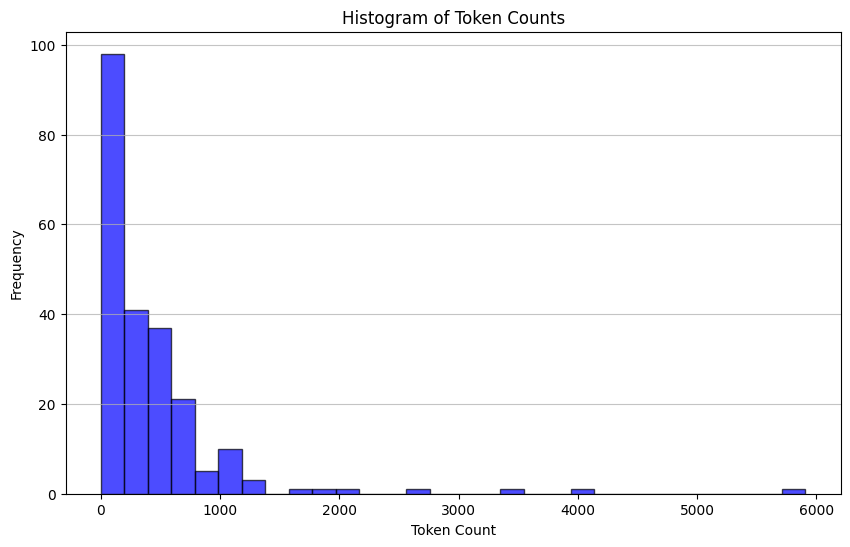

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(content_tokens, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()

# Getting Number of tokens For each Document using tiktoken

In [25]:
counts = [num_tokens_from_string(item["page_content"], "cl100k_base") for item in tqdm(json_data)]

100%|██████████| 222/222 [00:00<00:00, 1575.18it/s]


In [26]:
print(max(counts))

6485


# Plotting the histogram of token counts

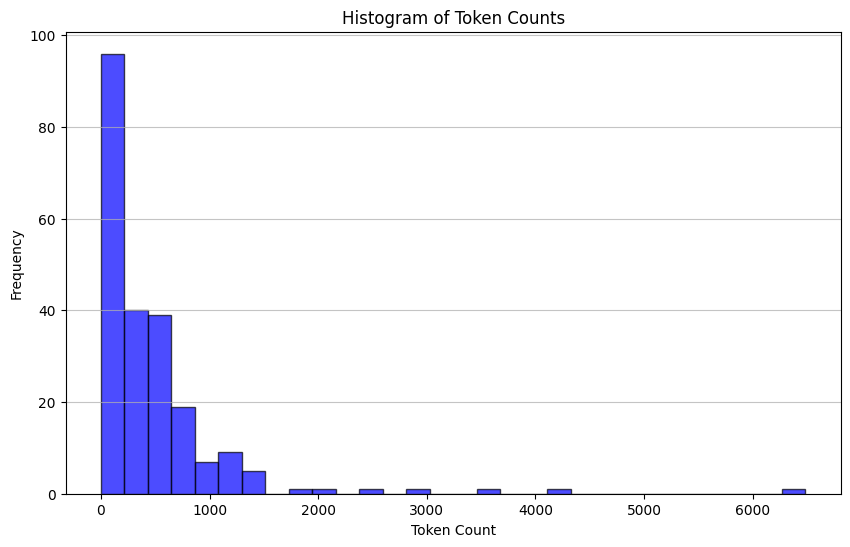

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()

# Getting the Max Sequence Length for Embedding Model

In [28]:
model_name = "intfloat/multilingual-e5-large" # Max Seq Len = 512

In [29]:
# model_name = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2" ## Max Seq Len = 128

In [30]:
embedding_model = SentenceTransformer(model_name_or_path=model_name, device="cuda") # choose the device to load the model to (note: GPU will often be *much* faster than CPU)

In [31]:
print(f"Model 's Maximum Sequence Length : {SentenceTransformer(model_name).max_seq_length}")

Model 's Maximum Sequence Length : 512


Because of that , We will use Embedding Engine "intfloat/multilingual-e5-large"

# Defining the chunk size for each Document

In [32]:
single_list_text_chunks = []
documents_and_chunks = json_data

In [33]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 250,
    chunk_overlap = 0,
    #separators = [" ."]#["\n"]# , "\n" , " " , ""]
)

In [34]:
for item in tqdm(documents_and_chunks):
    chunks = r_splitter.split_text(str(item['page_content']))
    if len(chunks) > 0:
        item["sentence_chunks"] = chunks
        #print(item["sentence_chunks"])
        #print("\n")
        item["num_chunks"] = len(chunks)
        #print("We 've here in That Document : "+str(len(item["sentence_chunks"]))+" Chunks ")
        single_chunk_tokens = [len(word_tokenize(item)) for item in tqdm(chunks)]
        item["single_chunk_tokens"] = single_chunk_tokens
        item["max_single_chunk_token"] = max(single_chunk_tokens)
        #print(single_chunk_tokens)
        #print("The Max number of tokens from the biggest chunk : " + str(max(single_chunk_tokens)) + " Tokens ")
        #print("==========================================================================================")
        #print("\n")
    else:
        print("\nThat Document has no data : \n")
        print(item)
        print("\n")
        print("==========================================================================================")

100%|██████████| 3/3 [00:00<00:00, 3046.71it/s]

100%|██████████| 8/8 [00:00<00:00, 1999.91it/s]

100%|██████████| 18/18 [00:00<00:00, 2001.31it/s]

100%|██████████| 14/14 [00:00<00:00, 2800.47it/s]

100%|██████████| 3/3 [00:00<00:00, 2999.50it/s]

100%|██████████| 11/11 [00:00<00:00, 5503.68it/s]

100%|██████████| 6/6 [00:00<00:00, 2001.74it/s]

100%|██████████| 21/21 [00:00<00:00, 3502.34it/s]

100%|██████████| 7/7 [00:00<00:00, 2334.24it/s]

100%|██████████| 13/13 [00:00<00:00, 4335.37it/s]

100%|██████████| 9/9 [00:00<00:00, 4502.47it/s]

100%|██████████| 1/1 [00:00<00:00, 999.83it/s]

100%|██████████| 4/4 [00:00<00:00, 2002.29it/s]

100%|██████████| 1/1 [00:00<00:00, 500.04it/s]

100%|██████████| 9/9 [00:00<00:00, 1801.42it/s]

100%|██████████| 14/14 [00:00<00:00, 4669.97it/s]

100%|██████████| 149/149 [00:00<00:00, 3106.04it/s]

100%|██████████| 27/27 [00:00<00:00, 3860.45it/s]

100%|██████████| 15/15 [00:00<00:00, 3753.18it/s]

100%|██████████| 1/1 [00:00<00:00, 500.33it/s]

100


That Document has no data : 

{'page_content': '', 'metadata': {'source': '49 page_source ', 'title': 'HiraDummyTestPageTrashNotforUse', 'link': 'https://www.expertflow.com/hiradummytestpagetrashnotforuse/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 26/26 [00:00<00:00, 3251.88it/s]

100%|██████████| 30/30 [00:00<00:00, 3001.72it/s]

100%|██████████| 29/29 [00:00<00:00, 2072.36it/s]

100%|██████████| 14/14 [00:00<00:00, 2000.96it/s]

100%|██████████| 2/2 [00:00<00:00, 2003.49it/s]

100%|██████████| 2/2 [00:00<00:00, 1997.76it/s]

100%|██████████| 2/2 [00:00<00:00, 2004.93it/s]

100%|██████████| 9/9 [00:00<00:00, 1801.25it/s]

100%|██████████| 55/55 [00:00<00:00, 3237.39it/s]

100%|██████████| 27/27 [00:00<00:00, 3376.25it/s]

100%|██████████| 2/2 [00:00<00:00, 2000.14it/s]

100%|██████████| 13/13 [00:00<00:00, 1625.99it/s]

100%|██████████| 3/3 [00:00<00:00, 1498.86it/s]

100%|██████████| 6/6 [00:00<00:00, 1501.99it/s]

100%|██████████| 41/41 [00:00<00:00, 2051.18it/s]

100%|██████████| 7/7 [00:00<00:00, 3503.60it/s]

100%|██████████| 22/22 [00:00<00:00, 2751.10it/s]

100%|██████████| 24/24 [00:00<00:00, 2667.78it/s]

100%|██████████| 36/36 [00:00<00:00, 3274.81it/s]

100%|██████████| 13/13 [00:00<00:00, 2602.05it


That Document has no data : 

{'page_content': '\n', 'metadata': {'source': '73 page_source ', 'title': 'My account', 'link': 'https://www.expertflow.com/my-account/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}



That Document has no data : 

{'page_content': '\n', 'metadata': {'source': '74 page_source ', 'title': 'Checkout', 'link': 'https://www.expertflow.com/checkout/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}



That Document has no data : 

{'page_content': '\n', 'metadata': {'source': '75 page_source ', 'title': 'Cart', 'link': 'https://www.expertflow.com/cart/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentence


100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 1001.03it/s]

100%|██████████| 21/21 [00:00<00:00, 3001.85it/s]

 36%|███▋      | 81/222 [00:00<00:01, 102.36it/s]


That Document has no data : 

{'page_content': '', 'metadata': {'source': '81 page_source ', 'title': 'Dashboards and Wallboards', 'link': 'https://www.expertflow.com/dashboards-and-wallboards/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}



That Document has no data : 

{'page_content': '', 'metadata': {'source': '82 page_source ', 'title': 'Blog', 'link': 'https://www.expertflow.com/blog/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 1/1 [00:00<00:00, 1001.98it/s]

100%|██████████| 1/1 [00:00<00:00, 1000.31it/s]

100%|██████████| 3/3 [00:00<00:00, 3001.65it/s]

100%|██████████| 1/1 [00:00<00:00, 999.36it/s]

100%|██████████| 19/19 [00:00<00:00, 3802.27it/s]



That Document has no data : 

{'page_content': '\xa0', 'metadata': {'source': '88 page_source ', 'title': 'Surfly &#8211; Testing Page', 'link': 'https://www.expertflow.com/surfly-testing-page/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\xa0'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}





100%|██████████| 1/1 [00:00<00:00, 1000.31it/s]

100%|██████████| 2/2 [00:00<00:00, 2000.62it/s]

100%|██████████| 39/39 [00:00<00:00, 2787.15it/s]

100%|██████████| 19/19 [00:00<00:00, 2375.88it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 1997.76it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 2002.53it/s]

100%|██████████| 1/1 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 2000.62it/s]

100%|██████████| 8/8 [00:00<00:00, 3997.91it/s]

100%|██████████| 5/5 [00:00<00:00, 714.70it/s]

100%|██████████| 3/3 [00:00<00:00, 1000.87it/s]

100%|██████████| 4/4 [00:00<00:00, 1334.17it/s]

100%|██████████| 5/5 [00:00<00:00, 1250.54it/s]

100%|██████████| 5/5 [00:00<00:00, 1250.61it/s]

100%|██████████| 6/6 [00:00<00:00, 1500.91it/s]

100%|██████████| 6/6 [00:00<00:00, 545.77it/s]

100%|██████████| 2/2 [00:00<00:00, 666.93it/s]

100%|██████████| 2/2 [00:00<00:00, 1000.55it/s]

100%|████


That Document has no data : 

{'page_content': '', 'metadata': {'source': '21 post_source ', 'title': 'Social Media Page Management &#8211; Filter Harassment', 'link': 'https://www.expertflow.com/blog/toxiclanguage/', 'post_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 8/8 [00:00<00:00, 2667.92it/s]

100%|██████████| 7/7 [00:00<00:00, 2335.73it/s]

100%|██████████| 8/8 [00:00<00:00, 4005.54it/s]

100%|██████████| 14/14 [00:00<00:00, 2800.74it/s]

100%|██████████| 10/10 [00:00<00:00, 3336.76it/s]

100%|██████████| 11/11 [00:00<00:00, 2200.89it/s]

100%|██████████| 7/7 [00:00<00:00, 1751.17it/s]

100%|██████████| 27/27 [00:00<00:00, 2701.74it/s]

100%|██████████| 9/9 [00:00<00:00, 3002.37it/s]

100%|██████████| 24/24 [00:00<00:00, 2668.56it/s]

100%|██████████| 14/14 [00:00<00:00, 3501.51it/s]

100%|██████████| 6/6 [00:00<00:00, 3000.93it/s]

100%|██████████| 12/12 [00:00<00:00, 3003.44it/s]

100%|██████████| 8/8 [00:00<00:00, 2667.50it/s]

100%|██████████| 18/18 [00:00<00:00, 3001.77it/s]

100%|██████████| 8/8 [00:00<00:00, 2666.86it/s]

100%|██████████| 9/9 [00:00<00:00, 3000.46it/s]

100%|██████████| 2/2 [00:00<00:00, 1000.19it/s]

100%|██████████| 11/11 [00:00<00:00, 2751.02it/s]

100%|██████████| 5/5 [00:00<00:00, 2500.78it/s]

1


That Document has no data : 

{'page_content': '', 'metadata': {'source': '26 page_source ', 'title': 'ACTIVE_CUIC Reports', 'link': 'https://www.expertflow.com/cuic-reports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 16/16 [00:00<00:00, 2668.66it/s]

100%|██████████| 14/14 [00:00<00:00, 2792.88it/s]

100%|██████████| 5/5 [00:00<00:00, 5001.55it/s]

100%|██████████| 14/14 [00:00<00:00, 2791.55it/s]

100%|██████████| 8/8 [00:00<00:00, 2653.15it/s]

100%|██████████| 17/17 [00:00<00:00, 2429.49it/s]

100%|██████████| 50/50 [00:00<00:00, 3334.69it/s]

100%|██████████| 37/37 [00:00<00:00, 5288.26it/s]



That Document has no data : 

{'page_content': '', 'metadata': {'source': '35 page_source ', 'title': 'ACTIVE_Expertflow &#8211; CUIC reports', 'link': 'https://www.expertflow.com/cuicreports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 18/18 [00:00<00:00, 3001.53it/s]

100%|██████████| 1/1 [00:00<00:00, 1000.55it/s]

100%|██████████| 33/33 [00:00<00:00, 3001.13it/s]

100%|██████████| 13/13 [00:00<00:00, 1853.62it/s]

100%|██████████| 8/8 [00:00<00:00, 2652.31it/s]

100%|██████████| 5/5 [00:00<00:00, 1667.98it/s]

100%|██████████| 14/14 [00:00<00:00, 4684.13it/s]

100%|██████████| 29/29 [00:00<00:00, 3623.21it/s]



That Document has no data : 

{'page_content': '', 'metadata': {'source': '45 page_source ', 'title': 'ACTIVE_USD_Install_Guide', 'link': 'https://www.expertflow.com/ms-usd-install-guide/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}





100%|██████████| 21/21 [00:00<00:00, 2620.74it/s]

100%|██████████| 21/21 [00:00<00:00, 4202.31it/s]

100%|██████████| 6/6 [00:00<00:00, 5883.99it/s]

100%|██████████| 8/8 [00:00<00:00, 4002.20it/s]

100%|██████████| 8/8 [00:00<00:00, 2668.98it/s]

100%|██████████| 15/15 [00:00<00:00, 2143.89it/s]

100%|██████████| 37/37 [00:00<00:00, 3084.84it/s]

100%|██████████| 19/19 [00:00<00:00, 3801.54it/s]

100%|██████████| 13/13 [00:00<00:00, 2603.42it/s]

100%|██████████| 13/13 [00:00<00:00, 3236.73it/s]

100%|██████████| 10/10 [00:00<00:00, 2501.22it/s]

100%|██████████| 16/16 [00:00<00:00, 4005.06it/s]

100%|██████████| 15/15 [00:00<00:00, 2500.98it/s]

100%|██████████| 30/30 [00:00<00:00, 2498.15it/s]

100%|██████████| 24/24 [00:00<00:00, 3435.14it/s]

100%|██████████| 12/12 [00:00<00:00, 5959.23it/s]

100%|██████████| 26/26 [00:00<00:00, 3714.43it/s]

100%|██████████| 17/17 [00:00<00:00, 3414.58it/s]

100%|██████████| 23/23 [00:00<00:00, 3835.29it/s]

100%|██████████| 22/22 [00:00<00:00,

In [35]:
random.sample(json_data, k=1)

[{'page_content': 'This blog describes how the award-winning Expertflow Hybridchat (HC) solution can be used if users want to continue using the Cisco ECE or Socialminer Chat. For simplicity’s sake, we’ll only mention ECE here, but by and large the same applies for Socialminer Chat in a UCCX environment. A difference of HC, ECE and Socialminer Chat is here\n. This blog describes in Scenario 2 how HC can be used with ECE without the HC gadget to: add or customize chat channels add chatbots filter inbound and outbound messages to meet PCI-DSS compliance and avoid DLP (Data Loss Prevention) Finally, we describe how a HC gadget can work alongside ECE and what value it adds. What Hybrid Chat (HC) adds to Cisco ECE HC conferences the customer, chatbots and an agent. It shows chatbot provided answers to a human agent within an add-on gadget, and auto-answers if the Chatbot’s confidence score is sufficiently high. The agent continues to chat with Cisco ECE in a separate gadget. Routing, report

In [53]:
# Turn text chunks into a single list
single_list_text_chunks = [chunk for item in (r_splitter.split_text(item['page_content']) for item in tqdm(documents_and_chunks)) for chunk in item]



  0%|          | 0/222 [00:00<?, ?it/s]

100%|██████████| 222/222 [00:00<00:00, 2019.35it/s]


In [54]:
# for item in text_chunks:
#     for chunk in item:
#         single_list_text_chunks.append(chunk)
#         print(chunk)
#         print("\n")

In [55]:
print("We've "+str(len(single_list_text_chunks)) + " Chunks ")

We've 2579 Chunks 


# Getting the Max Token length in our Chunks

In [56]:
content_tokens = [len(word_tokenize(item)) for item in tqdm(single_list_text_chunks)]



  0%|          | 0/2579 [00:00<?, ?it/s]

 14%|█▍        | 363/2579 [00:00<00:00, 3595.79it/s]

 28%|██▊       | 723/2579 [00:00<00:00, 3457.61it/s]

 42%|████▏     | 1074/2579 [00:00<00:00, 3466.39it/s]

 56%|█████▌    | 1441/2579 [00:00<00:00, 3543.82it/s]

 70%|██████▉   | 1796/2579 [00:00<00:00, 3509.25it/s]

 84%|████████▍ | 2174/2579 [00:00<00:00, 3588.66it/s]

100%|██████████| 2579/2579 [00:00<00:00, 3583.08it/s]


In [57]:
print("The Max Tokens in Whole Chunks : " + str(max(content_tokens)))

The Max Tokens in Whole Chunks : 70


# Passing Chunks to the Embedding Model

In [38]:
%%time
# Sentences are encoded/embedded by calling model.encode()
embedding_model.to("cuda")
# Create embeddings one by one on the GPU
for item in tqdm(documents_and_chunks):
    if "sentence_chunks" in item:
        item["embedding"] = embedding_model.encode(item["sentence_chunks"])
    else:
        print("\n")
        print(item)
        print("That Document " + item["page_content"] + " has no chunks to be embedded")

 23%|██▎       | 51/222 [00:07<00:21,  7.79it/s]



{'page_content': '', 'metadata': {'source': '49 page_source ', 'title': 'HiraDummyTestPageTrashNotforUse', 'link': 'https://www.expertflow.com/hiradummytestpagetrashnotforuse/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 36%|███▌      | 79/222 [00:10<00:08, 16.50it/s]



{'page_content': '\n', 'metadata': {'source': '73 page_source ', 'title': 'My account', 'link': 'https://www.expertflow.com/my-account/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}
That Document 
 has no chunks to be embedded


{'page_content': '\n', 'metadata': {'source': '74 page_source ', 'title': 'Checkout', 'link': 'https://www.expertflow.com/checkout/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\n'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}
That Document 
 has no chunks to be embedded


{'page_content': '\n', 'metadata': {'source': '75 page_source ', 'title': 'Cart', 'link': 'https://www.expertflow.com/cart/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences

 39%|███▉      | 87/222 [00:11<00:06, 20.26it/s]



{'page_content': '', 'metadata': {'source': '81 page_source ', 'title': 'Dashboards and Wallboards', 'link': 'https://www.expertflow.com/dashboards-and-wallboards/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


{'page_content': '', 'metadata': {'source': '82 page_source ', 'title': 'Blog', 'link': 'https://www.expertflow.com/blog/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 41%|████      | 90/222 [00:11<00:07, 18.32it/s]



{'page_content': '\xa0', 'metadata': {'source': '88 page_source ', 'title': 'Surfly &#8211; Testing Page', 'link': 'https://www.expertflow.com/surfly-testing-page/', 'page_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': ['\xa0'], 'page_sentence_count_spacy': 1, 'document_character_length': 1, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 1}
That Document   has no chunks to be embedded


 56%|█████▌    | 124/222 [00:13<00:07, 13.60it/s]



{'page_content': '', 'metadata': {'source': '21 post_source ', 'title': 'Social Media Page Management &#8211; Filter Harassment', 'link': 'https://www.expertflow.com/blog/toxiclanguage/', 'post_number': '1', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 81%|████████  | 180/222 [00:18<00:03, 11.39it/s]



{'page_content': '', 'metadata': {'source': '26 page_source ', 'title': 'ACTIVE_CUIC Reports', 'link': 'https://www.expertflow.com/cuic-reports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 86%|████████▌ | 191/222 [00:20<00:03,  7.90it/s]



{'page_content': '', 'metadata': {'source': '35 page_source ', 'title': 'ACTIVE_Expertflow &#8211; CUIC reports', 'link': 'https://www.expertflow.com/cuicreports/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


 89%|████████▉ | 198/222 [00:21<00:03,  6.89it/s]



{'page_content': '', 'metadata': {'source': '45 page_source ', 'title': 'ACTIVE_USD_Install_Guide', 'link': 'https://www.expertflow.com/ms-usd-install-guide/', 'page_number': '2', 'hour_of_update': '1', 'minute_for_update': '3'}, 'sentences': [], 'page_sentence_count_spacy': 0, 'document_character_length': 0, 'document_tokens_nltk': 0, 'document_tokens_tiktoken': 0}
That Document  has no chunks to be embedded


100%|██████████| 222/222 [00:24<00:00,  9.01it/s]

CPU times: total: 26 s
Wall time: 25.6 s


In [39]:
random.sample(documents_and_chunks, k=1)

[{'page_content': 'We are merging our award-winning Hybridchat together with Customer Interactions. The Finesse gadget to the left shows the chats, which the agent is working on. The gadget in the center shows this customer’s interaction history across all channels. The gadget to the right shows the customer profile, including identities through which the customer can be contacted. This allows agents to initiate a chat from a call, a call from a chat, or to switch from SMS chat to FB messenger. ',
  'metadata': {'source': '46 post_source ',
   'title': 'HC with CIM',
   'link': 'https://www.expertflow.com/blog/hybrid-chat-with-customer-interaction/',
   'post_number': '1',
   'hour_of_update': '1',
   'minute_for_update': '3'},
  'sentences': ['We are merging our award-winning Hybridchat together with Customer Interactions.',
   'The Finesse gadget to the left shows the chats, which the agent is working on.',
   'The gadget in the center shows this customer’s interaction history across

In [64]:
# %%time

# # Embed all texts in batches
text_chunk_embeddings = embedding_model.encode(single_list_text_chunks,
                                               batch_size=32,)
                                               #convert_to_tensor=True) # optional to return embeddings as tensor instead of array

### Save embeddings to file

In [40]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(documents_and_chunks)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [46]:
documents_and_chunks[0]['embedding']

array([[ 0.02856081, -0.01452802, -0.0132178 , ..., -0.02272131,
        -0.03075923, -0.01501387],
       [ 0.03869162, -0.01660912, -0.03836258, ..., -0.02003166,
        -0.05052672, -0.01495872],
       [ 0.03175511, -0.05058571, -0.01726758, ...,  0.00556144,
        -0.03296335, -0.00499656]], dtype=float32)

In [59]:
text_chunk_embeddings

tensor([[ 0.0286, -0.0145, -0.0132,  ..., -0.0227, -0.0308, -0.0150],
        [ 0.0387, -0.0166, -0.0384,  ..., -0.0200, -0.0505, -0.0150],
        [ 0.0318, -0.0506, -0.0173,  ...,  0.0056, -0.0330, -0.0050],
        ...,
        [ 0.0243,  0.0080, -0.0177,  ..., -0.0115, -0.0286, -0.0090],
        [ 0.0023, -0.0332, -0.0071,  ..., -0.0172, -0.0355,  0.0026],
        [ 0.0206, -0.0364, -0.0289,  ..., -0.0082, -0.0230, -0.0099]],
       device='cuda:0')

In [65]:
text_chunk_embeddings.shape[1]

1024

In [66]:
import numpy as np
import faiss

# Assuming documents is a list containing the dictionary with embeddings
# embeddings = [doc['embedding'] for doc in documents_and_chunks]

# Initialize a Faiss index
index = faiss.IndexFlatL2(text_chunk_embeddings.shape[1])  # Assuming L2 distance

# Add vectors to the index
index.add(text_chunk_embeddings)

# Save the index to disk
faiss.write_index(index, "my_index.faiss")

In [68]:
# Load the index from disk
index = faiss.read_index("my_index.faiss")

# Query vector
query_vector = np.random.rand(1, text_chunk_embeddings.shape[1]).astype('float32')

# Perform a nearest neighbor search
k = 5  # Number of nearest neighbors to retrieve
distances, indices = index.search(query_vector, k)

# Print the indices and corresponding distances
print("Indices of nearest neighbors:", indices)
print("Distances to nearest neighbors:", distances)

Indices of nearest neighbors: [[ 848  945 1183 2428  782]]
Distances to nearest neighbors: [[350.10385 350.10385 350.10385 350.24173 350.3002 ]]
